In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [86]:
import data_preprocessing

energy_consumption_data_train, energy_consumption_data_test = data_preprocessing.preprocess_data("Energy Consumption Dataset.csv")

energy_consumption_data_train.head()

,Wind Velocity for Station 02014,Sun Duration for Station 02014,Air Temperature for Station 02014,Precipitation Amount for Station 02014,Wind Velocity for Station 03987,Sun Duration for Station 03987,Air Temperature for Station 03987,Precipitation Amount for Station 03987,Wind Velocity for Station 03379,Sun Duration for Station 03379,Air Temperature for Station 03379,Precipitation Amount for Station 03379,Wind Velocity for Station 04928,Sun Duration for Station 04928,Air Temperature for Station 04928,Precipitation Amount for Station 04928,Quarter,Month,Energy Consumption
2015-02-20 10:00:00,0.469072,0.033333,0.408425,0.0,0.260638,0.000000,0.283465,0.0,0.141975,1.0,0.458498,0.0,0.291925,1.0,0.357285,0.0,1,2,42923.00
2015-02-20 11:00:00,0.371134,0.733333,0.434066,0.0,0.239362,0.683333,0.364173,0.0,0.129630,1.0,0.494071,0.0,0.260870,1.0,0.423154,0.0,1,2,40497.00
2015-02-20 12:00:00,0.350515,0.016667,0.454212,0.0,0.308511,1.000000,0.405512,0.0,0.203704,1.0,0.509881,0.0,0.260870,1.0,0.489022,0.0,1,2,40872.00
2015-02-20 13:00:00,0.412371,0.050000,0.459707,0.0,0.345745,1.000000,0.427165,0.0,0.148148,1.0,0.521739,0.0,0.254658,1.0,0.504990,0.0,1,2,42470.75
2015-02-20 14:00:00,0.319588,0.016667,0.459707,0.0,0.265957,0.766667,0.437008,0.0,0.080247,1.0,0.537549,0.0,0.416149,1.0,0.508982,0.0,1,2,46082.25


In [87]:
# target for train and test
target_train = energy_consumption_data_train["Energy Consumption"]
target_test = energy_consumption_data_test["Energy Consumption"]

# dropped target
energy_consumption_data_train = energy_consumption_data_train.drop(columns="Energy Consumption")
energy_consumption_data_test = energy_consumption_data_test.drop(columns="Energy Consumption")

display(energy_consumption_data_train.head())
display(energy_consumption_data_test.head())

,Wind Velocity for Station 02014,Sun Duration for Station 02014,Air Temperature for Station 02014,Precipitation Amount for Station 02014,Wind Velocity for Station 03987,Sun Duration for Station 03987,Air Temperature for Station 03987,Precipitation Amount for Station 03987,Wind Velocity for Station 03379,Sun Duration for Station 03379,Air Temperature for Station 03379,Precipitation Amount for Station 03379,Wind Velocity for Station 04928,Sun Duration for Station 04928,Air Temperature for Station 04928,Precipitation Amount for Station 04928,Quarter,Month
2015-02-20 10:00:00,0.469072,0.033333,0.408425,0.0,0.260638,0.000000,0.283465,0.0,0.141975,1.0,0.458498,0.0,0.291925,1.0,0.357285,0.0,1,2
2015-02-20 11:00:00,0.371134,0.733333,0.434066,0.0,0.239362,0.683333,0.364173,0.0,0.129630,1.0,0.494071,0.0,0.260870,1.0,0.423154,0.0,1,2
2015-02-20 12:00:00,0.350515,0.016667,0.454212,0.0,0.308511,1.000000,0.405512,0.0,0.203704,1.0,0.509881,0.0,0.260870,1.0,0.489022,0.0,1,2
2015-02-20 13:00:00,0.412371,0.050000,0.459707,0.0,0.345745,1.000000,0.427165,0.0,0.148148,1.0,0.521739,0.0,0.254658,1.0,0.504990,0.0,1,2
2015-02-20 14:00:00,0.319588,0.016667,0.459707,0.0,0.265957,0.766667,0.437008,0.0,0.080247,1.0,0.537549,0.0,0.416149,1.0,0.508982,0.0,1,2


,Wind Velocity for Station 02014,Sun Duration for Station 02014,Air Temperature for Station 02014,Precipitation Amount for Station 02014,Wind Velocity for Station 03987,Sun Duration for Station 03987,Air Temperature for Station 03987,Precipitation Amount for Station 03987,Wind Velocity for Station 03379,Sun Duration for Station 03379,Air Temperature for Station 03379,Precipitation Amount for Station 03379,Wind Velocity for Station 04928,Sun Duration for Station 04928,Air Temperature for Station 04928,Precipitation Amount for Station 04928,Quarter,Month
2021-05-13 06:00:00,0.147929,0.000000,0.420319,0.983849,0.204545,0.0,0.450902,0.979508,0.189655,0.0,0.413043,0.000000,0.987866,0.633333,0.454352,0.0,2,5
2021-05-13 07:00:00,0.159763,0.000000,0.438247,0.983849,0.261364,0.0,0.450902,0.979508,0.181034,0.0,0.426087,0.005333,0.986978,1.000000,0.507431,0.0,2,5
2021-05-13 08:00:00,0.177515,0.000000,0.462151,0.983849,0.238636,0.0,0.450902,0.979508,0.172414,0.0,0.454348,0.002667,0.986781,1.000000,0.518047,0.0,2,5
2021-05-13 09:00:00,0.201183,0.516667,0.482072,0.983849,0.267045,0.0,0.450902,0.979508,0.224138,0.0,0.467391,0.000000,0.986485,1.000000,0.562633,0.0,2,5
2021-05-13 10:00:00,0.224852,0.383333,0.501992,0.983849,0.244318,0.0,0.452906,0.979508,0.267241,0.0,0.484783,0.000000,0.986978,0.616667,0.558386,0.0,2,5


## Fitting the Model onto the Training Data ##

In [88]:
linReg = LinearRegression()

linReg.fit(energy_consumption_data_train, target_train)

LinearRegression()

In [89]:
m = linReg.coef_
m

array([-30785.17655064,   -832.26705274,   -230.27701096,  -5787.86615152,
       -33199.31514569,   -562.83769231, -12011.46144851,  -8570.65579043,
        -1968.25251937,   -966.70952832,  -1534.02699834,   7403.23208367,
        -6267.54106898,  -1344.87487151,  -2749.06767305,  12350.23088071,
          529.86442838,   -123.6248639 ])

In [90]:
predict_train = linReg.predict(energy_consumption_data_train)
predict_train

array([33477.41382192, 35239.5961885 , 33144.56863082, ...,
       48945.72660776, 47716.1422969 , 48545.17102577])

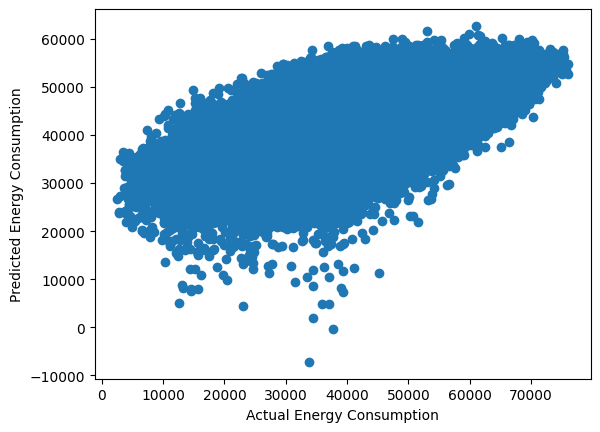

In [91]:
plt.scatter(target_train, predict_train)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.show()

## Evaluation with R2 and RMSE of Training ##

In [92]:
r2_score(target_train, predict_train)

0.3173485023940539

In [127]:
rmse = mean_squared_error(target_train, predict_train, squared=False)
rmse

9814.41589961911

## Testing the Trained Model with Testing Data ##

In [94]:
predict_test = linReg.predict(energy_consumption_data_test)
predict_test

array([26116.55706888, 23264.75203039, 23393.22092996, ...,
        7362.15193204, 12073.40753266, 10525.15307353])

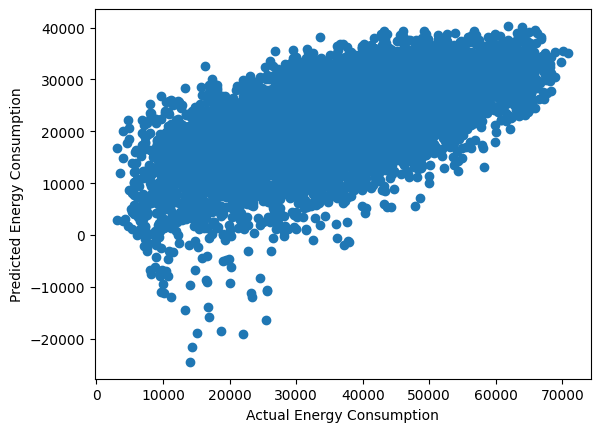

In [95]:
plt.scatter(target_test, predict_test)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.show()

## Evaluation with R2 and RMSE of Test ##

In [96]:
r2_score(target_test, predict_test)

-0.9690857302747846

In [97]:
rmse = mean_squared_error(target_test, predict_test, squared=False)
rmse

18152.20759372999

## Improving Multiple Linear Regression using Polynomial Regression with Default Values ##

In [98]:
# create a transformer generating polynomial features
transformer = PolynomialFeatures(degree=2, include_bias=False)
estimator = LinearRegression()
pipeline = Pipeline([("transformer", transformer), ("estimator", estimator)])
pipeline.fit(energy_consumption_data_train, target_train)

predict_train = pipeline.predict(energy_consumption_data_train)
predict_train

array([28775.90073209, 32527.88935113, 33333.33001191, ...,
       46175.92935308, 45354.754556  , 44618.52043202])

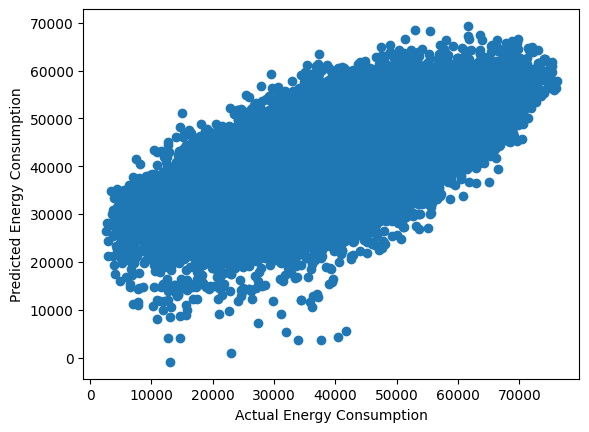

In [99]:
plt.scatter(target_train, predict_train)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.show()

## Evaluation with R2 and RMSE of Training ##

In [100]:
r2_score(target_train, predict_train)

0.3871922875576421

In [101]:
rmse = mean_squared_error(target_train, predict_train, squared=False)
rmse

9814.41589961911

## Predict on Test Data ##

In [102]:
predict_test = pipeline.predict(energy_consumption_data_test)
predict_test

array([36390.56198226, 30674.3135453 , 30412.45574821, ...,
       14856.76771701, 16757.55937287, 12761.90423726])

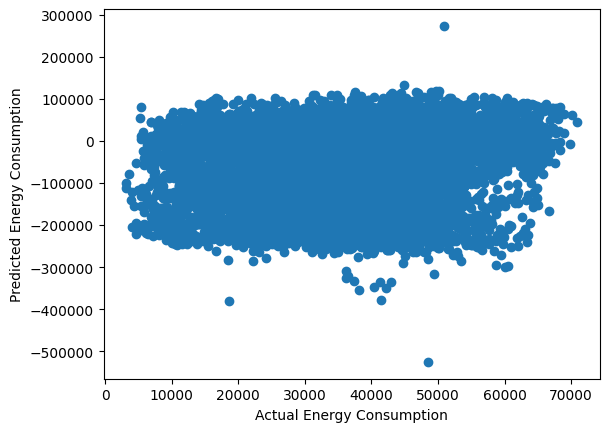

In [103]:
plt.scatter(target_test, predict_test)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.show()

## Evaluation with R2 and RMSE of Test ##

In [104]:
r2_score(target_test, predict_test)

-87.05832554211035

In [105]:
rmse = mean_squared_error(target_test, predict_test, squared=False)
rmse

121389.84269632054

## Polynomial Regression with Hyperparameter Tuning ##

In [110]:
# Definition of hyperparameters
param_grid = [{
    "transformer__degree": list(range(2, 4))
}]

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=None, verbose=3)
grid_search.fit(energy_consumption_data_train, target_train)
print("Best Degree: ", grid_search.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ....transformer__degree=2;, score=-117429514.896 total time=   1.6s
[CV 2/5] END .....transformer__degree=2;, score=-92904258.380 total time=   0.7s
[CV 3/5] END .....transformer__degree=2;, score=-90928130.982 total time=   0.6s
[CV 4/5] END ....transformer__degree=2;, score=-109753787.865 total time=   0.9s
[CV 5/5] END ....transformer__degree=2;, score=-135769429.892 total time=   0.5s
[CV 1/5] END ....transformer__degree=3;, score=-160521253.071 total time=   4.7s
[CV 2/5] END ....transformer__degree=3;, score=-236447733.118 total time=   4.2s
[CV 3/5] END ....transformer__degree=3;, score=-180956954.394 total time=   6.4s
[CV 4/5] END ....transformer__degree=3;, score=-133082257.559 total time=   3.9s
[CV 5/5] END ....transformer__degree=3;, score=-150952611.201 total time=   4.0s
Best Degree:  {'transformer__degree': 2}


Due to a remaining best degree of two and a high computational workload we will not dive deeper to gain better values. Because of the remaining outliers we will explore the possible advantages of a Lasso Regression yielding towards reducing the amount of tiny coefficients and so the amount of outliers. 

## Lasso Regression to Remove Remaining Outliers ##

In [119]:
model = make_pipeline(StandardScaler(with_mean=False), Lasso(alpha=0.4))
pipeline.fit(energy_consumption_data_train, target_train)

predict_train = pipeline.predict(energy_consumption_data_train)
predict_train

array([28775.90073209, 32527.88935113, 33333.33001191, ...,
       46175.92935308, 45354.754556  , 44618.52043202])

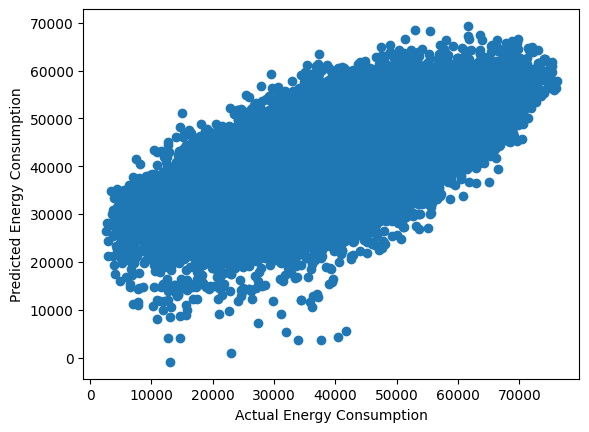

In [120]:
plt.scatter(target_train, predict_train)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.show()

## Evaluation of Training ##

In [121]:
r2_score(target_train, predict_train)

0.3871922875576421

In [122]:
rmse = mean_squared_error(target_train, predict_train, squared=False)
rmse

9814.41589961911

## Predict on Test Data ##

In [123]:
predict_test = pipeline.predict(energy_consumption_data_test)
predict_test

array([36390.56198226, 30674.3135453 , 30412.45574821, ...,
       14856.76771701, 16757.55937287, 12761.90423726])

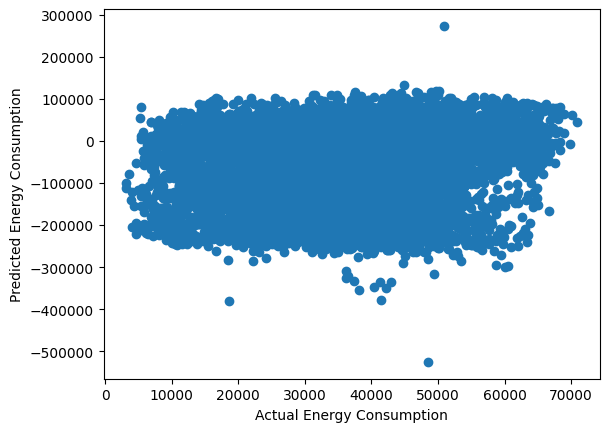

In [124]:
plt.scatter(target_test, predict_test)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.show()

## Evaluation on Test ##

In [125]:
r2_score(target_test, predict_test)

-87.05832554211035

In [126]:
rmse = mean_squared_error(target_test, predict_test, squared=False)
rmse

121389.84269632054